It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# Prevent Overfitting: Regularization


In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(0)

def plot_history(history: tf.keras.callbacks.History) -> None:
    """Plot training and validation loss/accuracy curves.
    
    Args:
        history: History object returned by model.fit()
    """
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Loss plot
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.plot(hist['epoch'], hist['loss'], label='Train')
    ax1.plot(hist['epoch'], hist['val_loss'], label='Validation')
    ax1.legend()
    ax1.grid(True)
    
    # Accuracy plot
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label='Validation')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

We will use the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), consisting of a collection of 28x28 pixel images corresponding in digits from 0 to 9 manuscripts. The purpose of this data set is to train models that recognize handwritten numbers.

We will train, therefore, an [OCR (Optical Character Recognition)](https://en.wikipedia.org/wiki/Optical_character_recognition) model for multiclass classification (numbers from 0 to 9).

In [63]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [64]:
x_train[0].shape

(28, 28)

As they are 8-bit images, the colors (in this case only one channel, the gray channel) of each pixel are encoded with a value between 0 and 255, with 0 being black and 255 being white. It is usual to normalize the values to work with a range between 0.0 and 1.0.

In [65]:
x_train, x_test = x_train / 255.0, x_test / 255.0

We visualize a random image of the training set.

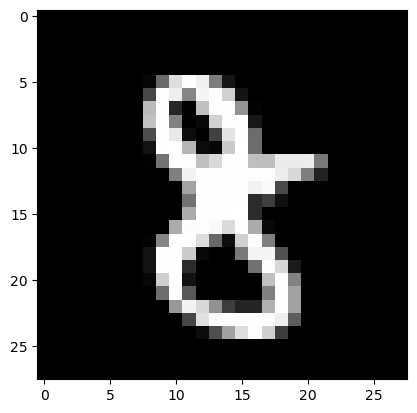

In [66]:
import numpy as np

i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i], cmap='gray')
plt.show()

We reduce the dataset for  inducing more overfitting

In [67]:
from sklearn.model_selection import train_test_split
# split into train test sets
_, x, _, y = train_test_split(
    x_train, y_train, test_size=0.02, random_state=1, stratify=y_train)

num_classes = 10
from collections import Counter 
x.shape, y.shape, Counter(y)

((1200, 28, 28),
 (1200,),
 Counter({2: 119,
          8: 117,
          6: 118,
          9: 119,
          3: 123,
          4: 117,
          0: 119,
          7: 125,
          5: 108,
          1: 135}))

#### What is Overfitting?

**Overfitting** occurs when a model learns the training data too well, including its noise and random fluctuations, rather than the underlying pattern. The model performs well on training data but poorly on unseen data. The goal is not to fit the training set perfectly, but to **generalize** to new data.

#### Why do we need to use regularization?

We are going to assign the classes randomly to each image with random shuffle.

In [68]:
y_shuffle = np.copy(y)
np.random.shuffle(y_shuffle)
y[:5], y_shuffle[:5]

(array([2, 8, 6, 9, 3], dtype=uint8), array([7, 1, 1, 8, 1], dtype=uint8))

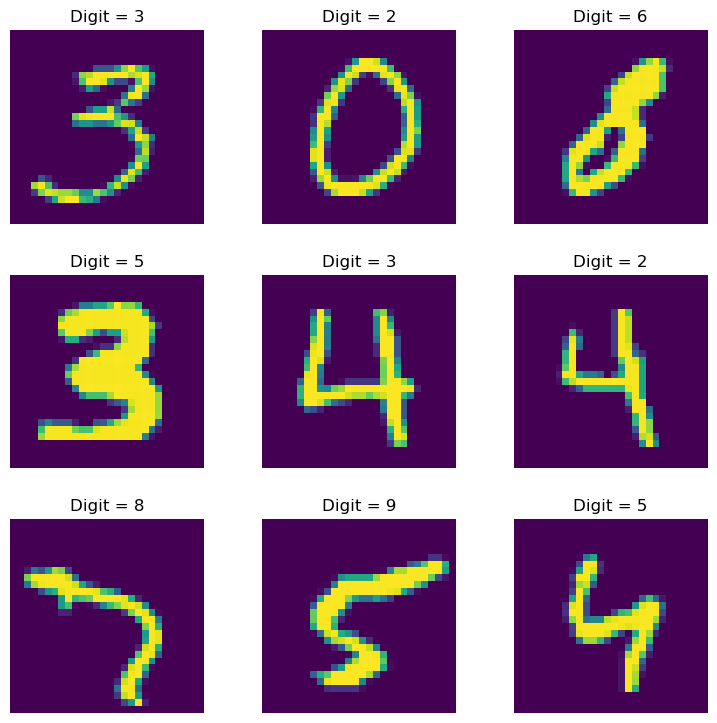

In [69]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(0, 9):
    ind = np.random.randint(len(y_shuffle))
    axes[i].imshow(x[ind].reshape(28, 28))
    axes[i].set_title(
        f"Digit = {y_shuffle[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.3) 

Lets build a model for learning the new random classes

In [70]:
# Input
inputs = tf.keras.Input(shape=(28, 28))
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(64, activation='relu')(flat)
# hidden layer 2
l_2 = layers.Dense(64, activation='relu')(l_1)
# hidden layer 3
l_3 = layers.Dense(64, activation='relu')(l_2)

# Outputs
outputs = layers.Dense(10, activation='softmax')(l_3)

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs)

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    x,
    y_shuffle,
    batch_size=64,
    epochs=100,
    shuffle=True
)

Epoch 1/100
19/19 [==============================] - 0s 6ms/step - loss: 2.4172 - accuracy: 0.1058
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 2.3300 - accuracy: 0.1192
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 2.3018 - accuracy: 0.1417
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 2.2825 - accuracy: 0.1417
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 2.2664 - accuracy: 0.1600
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 2.2503 - accuracy: 0.1525
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 2.2269 - accuracy: 0.1717
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 2.2116 - accuracy: 0.1842
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 2.1860 - accuracy: 0.1992
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 2.1598 - accuracy: 0.2100
Epoch 11/

In [72]:
results = model.evaluate(x, y_shuffle, verbose=0)
print('Train Accuracy: {}'.format(results[1]))

Train Accuracy: 0.11833333224058151


1/1 [==============================] - 0s 8ms/step


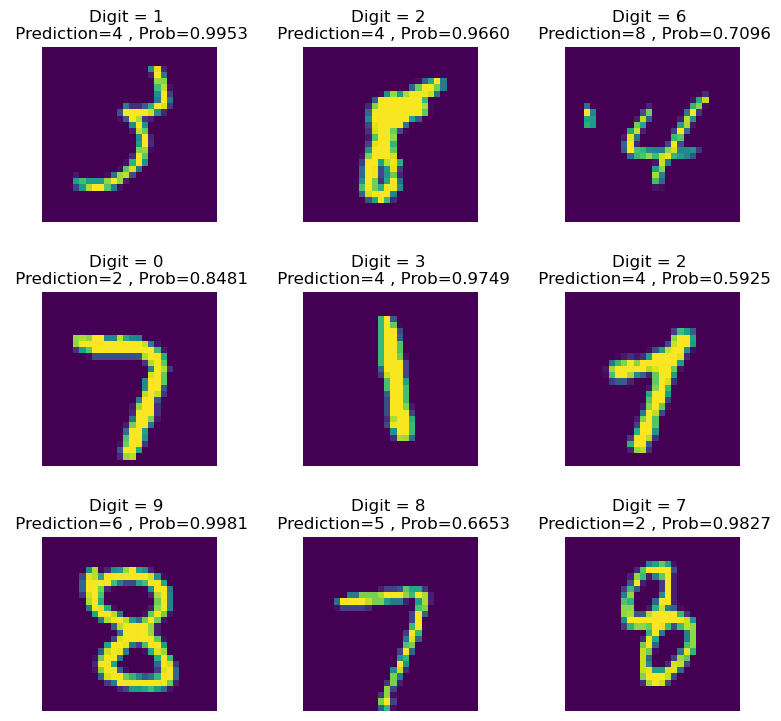

In [73]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(0, 9):
    ind = np.random.randint(len(y_shuffle))
    pred_pobs = model.predict(np.expand_dims(x[ind], 0)).flatten()
    pred_class = np.argmax(pred_pobs)
    prob = np.max(pred_pobs)
    axes[i].imshow(x[ind].reshape(28, 28))
    axes[i].set_title(
        f"Digit = {y_shuffle[ind]} \n Prediction={pred_class} , Prob={prob:.4f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5) 

We can see that the model has fully fitted the training set. It practically does not matter what data you introduce into the neural network, it will almost always fit. The objective is not to fit the training set, it is to **GENERALIZE**.

#### Regularization for preventing overfitting

To get the model to **generalize**, we can use one of the numerous regularization techniques

We build a model consisting of:

- Input with dimension (28,28)
- Flatten layer
- Dense hidden  layer with 256 neurons and ReLU as activation function
- Second dense hidden layer with 128 neurons and ReLU as activation function
- Third dense  hidden layer with 128 neurons and ReLU as activation function
- Output layer with a single neuron that implements the sigmoid function.

In [74]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')  
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)  
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)  
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)  

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)  

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model')

In [75]:
model.summary()

Model: "dont_overfit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 layer_3 (Dense)             (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 251658 (983.04 KB)
Trainable param

We define the following configuration for training:
- **optimizer**: adam
- **loss function**: sparse categorical crossentropy (for multi-class classification with integer labels)
- **metrics**: accuracy

In [76]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
history = model.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 [==============================] - 0s 14ms/step - loss: 1.5465 - accuracy: 0.5052 - val_loss: 0.7739 - val_accuracy: 0.7875
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.8146 - val_loss: 0.5386 - val_accuracy: 0.8333
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8760 - val_loss: 0.4531 - val_accuracy: 0.8625
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.9156 - val_loss: 0.4016 - val_accuracy: 0.8833
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1917 - accuracy: 0.9521 - val_loss: 0.3607 - val_accuracy: 0.8958
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1654 - accuracy: 0.9510 - val_loss: 0.4336 - val_accuracy: 0.8625
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1452 - accuracy: 0.9583 - val_loss: 0.4461 - val_accuracy: 0.9000
Epoch 8/100


In [78]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.9886322021484375
Test Accuracy: 0.881600022315979


We visualize the evolution of the values in each epoch of the loss function and accuracy.

In [79]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [80]:
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.546515,0.505208,0.773864,0.787500,0
1,0.606399,0.814583,0.538624,0.833333,1
2,0.403346,0.876042,0.453099,0.862500,2
3,0.277335,0.915625,0.401595,0.883333,3
4,0.191670,0.952083,0.360695,0.895833,4


<a id='overfitting_results'></a>
When interpreting both graphs, it is evident that the model over-fits the training values and is not able to generalize well for the validation values. **It is a clear example of overfitting**.

The following function will be useful throughout the different practical examples.

In [81]:
def show_samples(x_test, y_test, model):
    """Display a grid of sample predictions with correct (green) and incorrect (red) labels."""
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, -1)
    
    L = 5
    W = 5
    fig, axes = plt.subplots(L, W, figsize=(14, 14))
    axes = axes.ravel()

    for i in np.arange(0, L * W):
        ind = np.random.randint(len(y_test))
        axes[i].imshow(x_test[ind].reshape(28, 28))
        prob_pred = np.max(predictions[ind, :])
        class_pred = int(predicted_classes[ind])
        original_class = int(y_test[ind])
        if class_pred == original_class:
            color = 'green'
        else:
            color = 'red'
        title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
        class_pred, original_class, prob_pred)
        axes[i].set_title(title, color=color)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

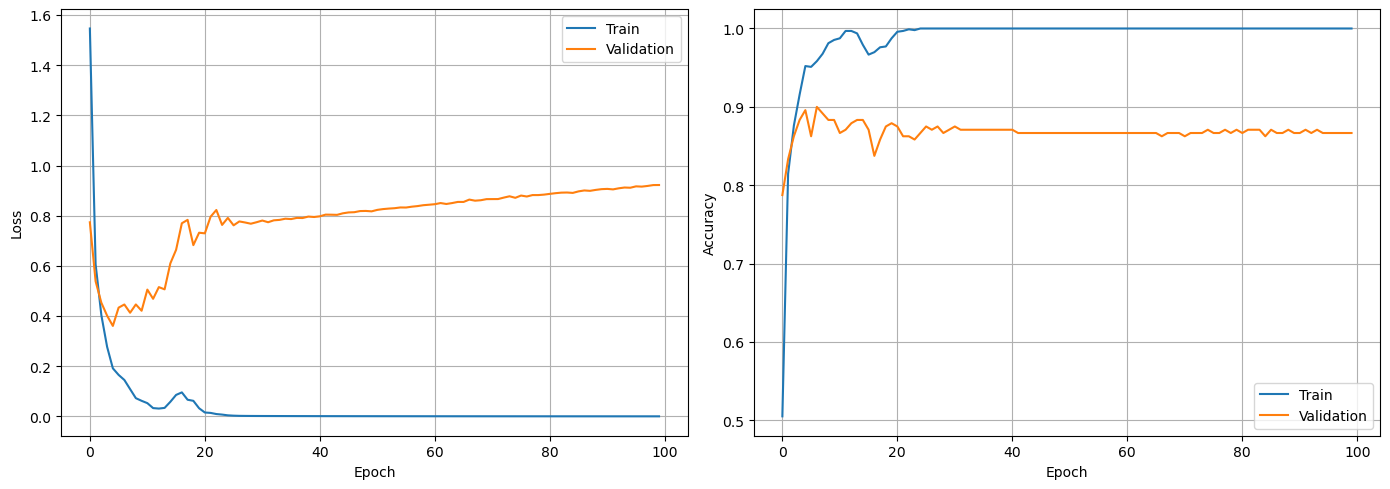

In [82]:
plot_history(history)

In [83]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.9886322021484375
Test Accuracy: 0.881600022315979


313/313 [==============================] - 0s 999us/step


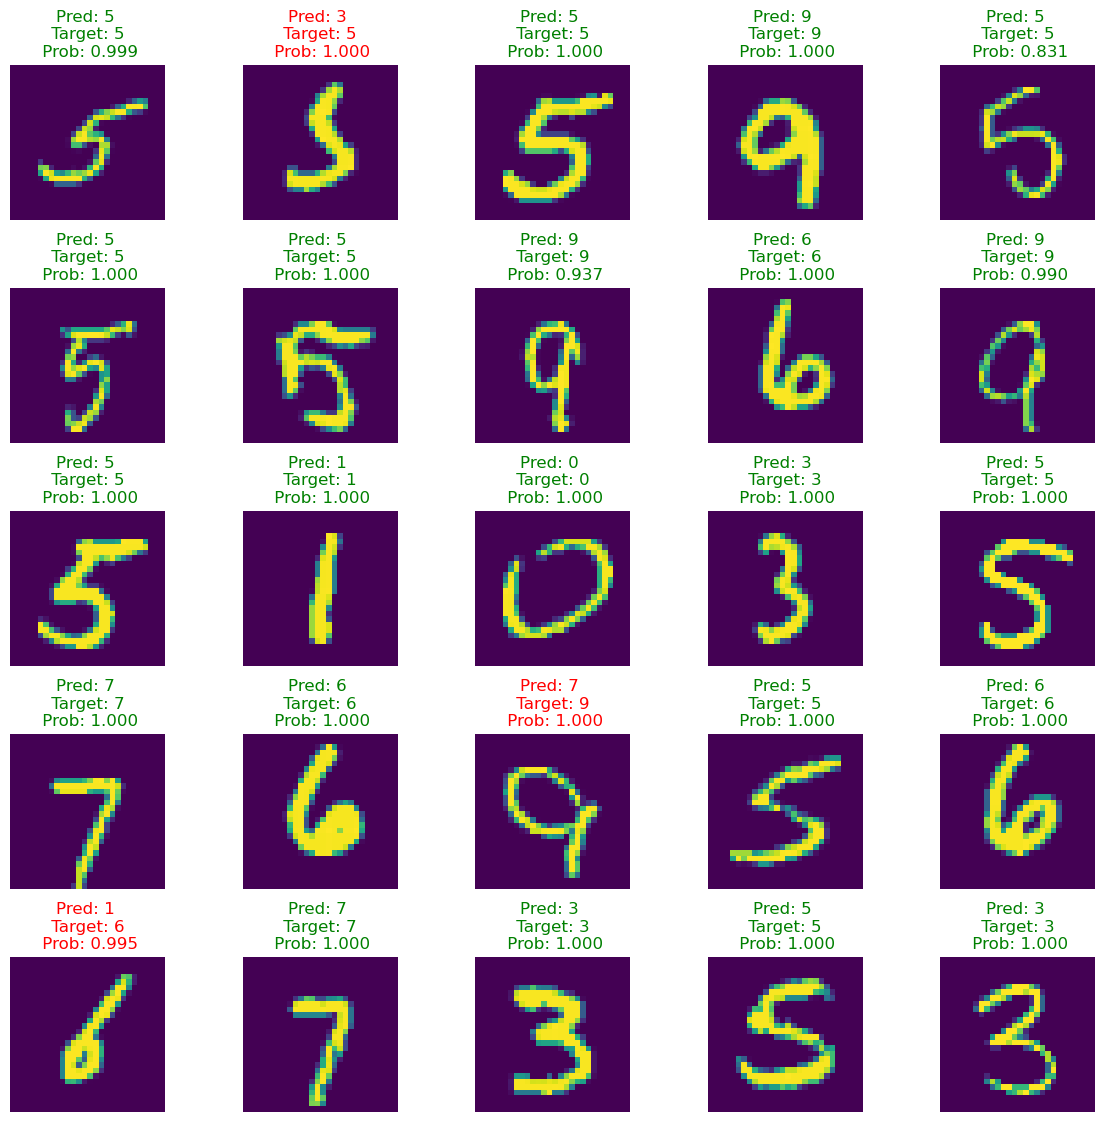

In [84]:
show_samples(x_test, y_test, model)

## Create a simpler model

The simplest way to prevent overfitting is to create  a simple model: A model with less number of  parameters (which is determined by the number of layers and the number of units per layer). 

A more complex model with more parameters will have much more capacity and will be able to learn almost any training set. Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

In [85]:
# Input layer
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
flat = layers.Flatten()(inputs)

# First hidden layer
l_1 = layers.Dense(8, activation='relu', name='layer_1')(flat)

# Output layer
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_1)
model_simpler = keras.Model(
    inputs=inputs, outputs=outputs, name='simpler_model')

model_simpler.summary()

Model: "simpler_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 8)                 6280      
                                                                 
 output_layer (Dense)        (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model_simpler.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
history_simpler = model_simpler.fit(x,
                                    y,
                                    batch_size=64,
                                    epochs=100,
                                    validation_split=0.2,
                                    shuffle=True)

Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 2.2134 - accuracy: 0.1906 - val_loss: 2.0660 - val_accuracy: 0.2875
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9710 - accuracy: 0.2937 - val_loss: 1.7888 - val_accuracy: 0.4125
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1.7261 - accuracy: 0.4490 - val_loss: 1.5520 - val_accuracy: 0.5375
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 1.5126 - accuracy: 0.5854 - val_loss: 1.3531 - val_accuracy: 0.6625
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 1.3426 - accuracy: 0.6573 - val_loss: 1.2140 - val_accuracy: 0.6917
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2123 - accuracy: 0.6948 - val_loss: 1.0947 - val_accuracy: 0.7542
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0947 - accuracy: 0.7292 - val_loss: 1.0104 - val_accuracy: 0.7583
Epoch 8/100


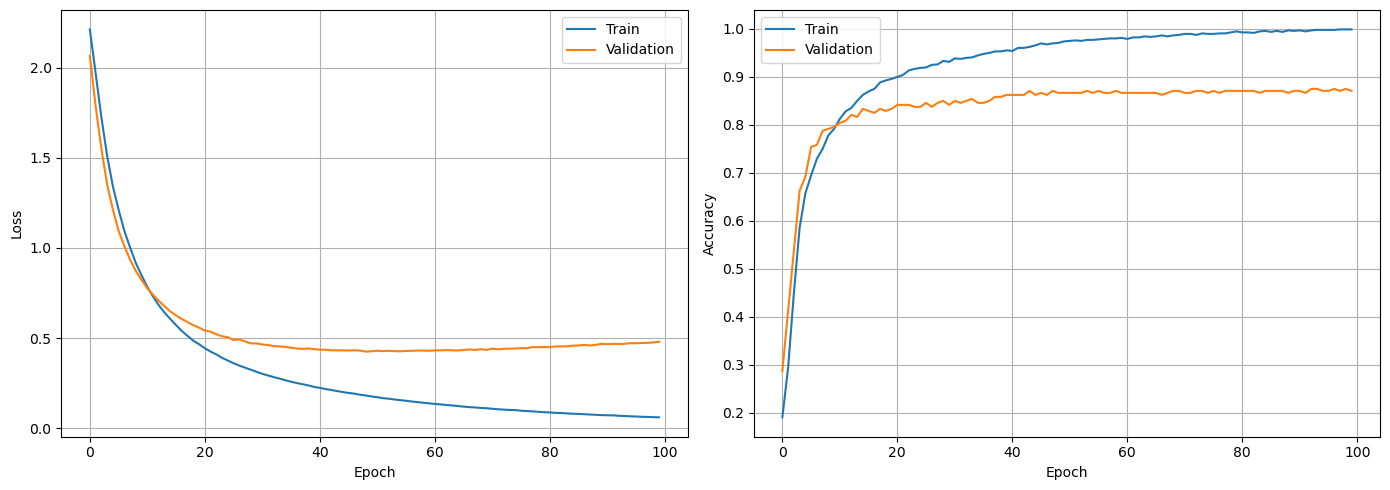

In [87]:
plot_history(history_simpler)

In [88]:
results = model_simpler.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5463711619377136
Test Accuracy: 0.8597999811172485


## Reduce batch_size

Other method is decreasing the `batch_size`during the gradient descend to add more uncertainty to the estimation of the parameter gradients, thus reducing the capacity of the model

In [89]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')  
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)  
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)  
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)  

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)  

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model')
## same model
model.summary()

Model: "dont_overfit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 layer_3 (Dense)             (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 251658 (983.04 KB)
Trainable param

In [90]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model.fit(
    x,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/100
60/60 [==============================] - 0s 5ms/step - loss: 1.0872 - accuracy: 0.6625 - val_loss: 0.5805 - val_accuracy: 0.8208
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8656 - val_loss: 0.4713 - val_accuracy: 0.8708
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8813 - val_loss: 0.5317 - val_accuracy: 0.8500
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1974 - accuracy: 0.9396 - val_loss: 0.4504 - val_accuracy: 0.8625
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.2030 - accuracy: 0.9333 - val_loss: 0.5111 - val_accuracy: 0.8750
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9365 - val_loss: 0.6292 - val_accuracy: 0.8667
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.9417 - val_loss: 0.7550 - val_accuracy: 0.8375
Epoch 8/100
6

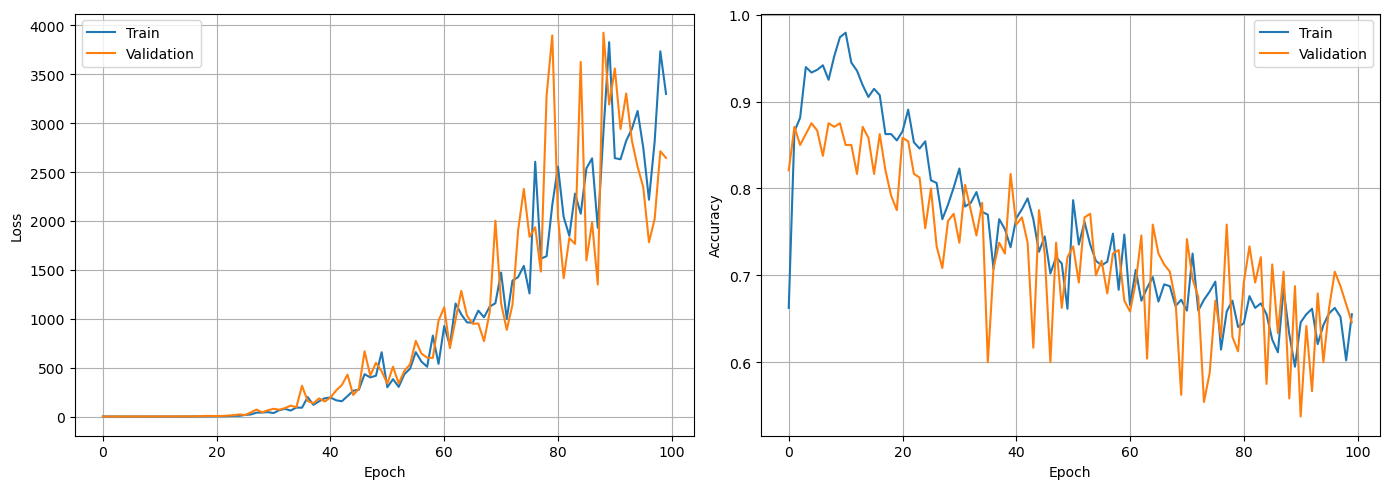

In [91]:
plot_history(history_2)

In [92]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 2326.69091796875
Test Accuracy: 0.6445000171661377


### Question 1:
#### What differences do you see if you change the batch_size to a lower or higher value? For example to 1 and to 512

<a id='dropout'></a>
## Dropout

[Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) is a regularization technique that randomly "drops" (sets to zero) a fraction of neurons during training.

**How it works:**
1. During training, each neuron has a probability `p` (dropout rate) of being temporarily removed
2. The remaining neurons' outputs are scaled by `1/(1-p)` to maintain expected values
3. During inference, all neurons are used (no dropout applied)

**Why it works:**
- Prevents neurons from co-adapting (relying too much on specific other neurons)
- Forces the network to learn redundant representations
- Acts like training an ensemble of different networks

**Typical values:** 0.2 to 0.5 (higher = more regularization)

```python
tf.keras.layers.Dropout(rate)
```

With Functional API:
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
With Sequential:
```python
model.add(layers.Dropout(0.4))
```

In [93]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.5, name='dropout_flat')(flat)
# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.5, name='dropout_l3')(l_3)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_dropout = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout')

In [94]:
model_dropout.summary()

Model: "dont_overfit_model_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dropout_flat (Dropout)      (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 dropout_l1 (Dropout)        (None, 256)               0         
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_l2 (Dropout)        (None, 128)

In [95]:
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [96]:
history_dropout = model_dropout.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 3.8775 - accuracy: 0.1531 - val_loss: 1.9917 - val_accuracy: 0.3333
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 3.3565 - accuracy: 0.2042 - val_loss: 1.3919 - val_accuracy: 0.5500
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 2.7327 - accuracy: 0.2948 - val_loss: 1.1924 - val_accuracy: 0.6375
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 2.4301 - accuracy: 0.3406 - val_loss: 1.0822 - val_accuracy: 0.6500
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 2.1516 - accuracy: 0.4042 - val_loss: 0.9208 - val_accuracy: 0.7208
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 1.7491 - accuracy: 0.4823 - val_loss: 0.8187 - val_accuracy: 0.7833
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 1.7106 - accuracy: 0.4875 - val_loss: 0.7368 - val_accuracy: 0.7750
Epoch 8/100


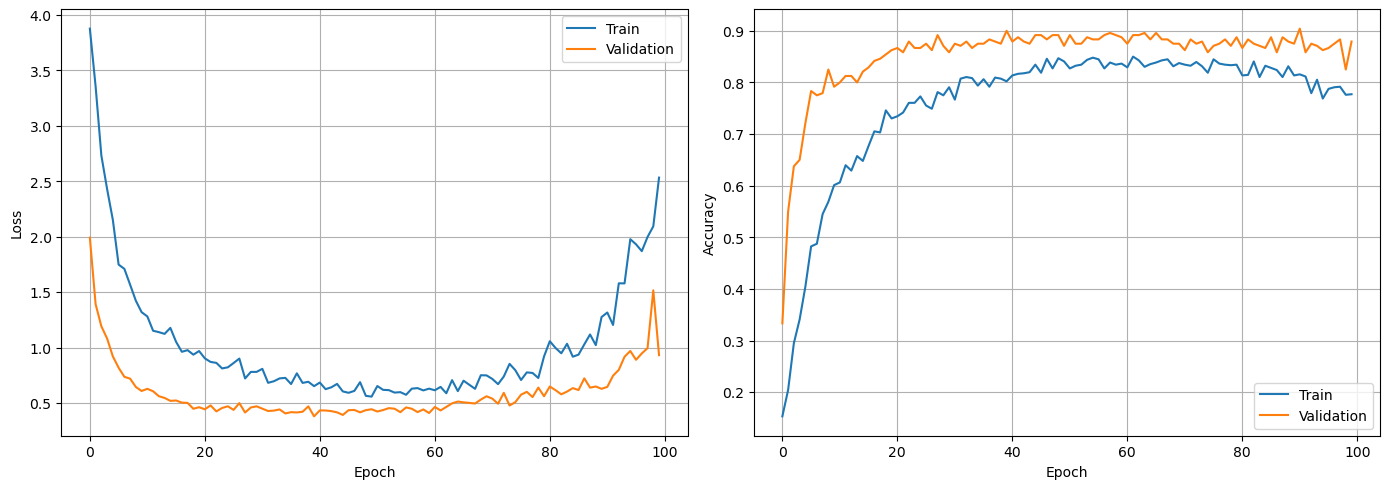

In [97]:
plot_history(history_dropout)

In [98]:
results = model_dropout.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 1.2367076873779297
Test Accuracy: 0.8723999857902527


### Question 2:
#### What happens if you change the dropout to 0.1 or 0.9? And what if you put it only on one layer?
#### What happens if we delete the flatten first dropout?

## Batch Normalization

[Batch normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) normalizes the inputs of each layer by adjusting and scaling the activations.

**How it works:**
1. For each mini-batch, compute the mean and variance of the activations
2. Normalize: `x_norm = (x - mean) / sqrt(variance + epsilon)`
3. Scale and shift: `output = gamma * x_norm + beta` (learnable parameters)

**Benefits:**
- Reduces internal covariate shift (layer inputs change during training)
- Allows higher learning rates
- Acts as a regularizer (reduces need for dropout)
- Makes training more stable

**Note:** Behavior differs between training (uses batch statistics) and inference (uses running averages).

With Functional API:
```python
next_layer = layers.BatchNormalization()(prev_layer)
```
With Sequential:
```python
model.add(layers.BatchNormalization())
```

In [99]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.BatchNormalization()(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.BatchNormalization()(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)




model_batch_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_batch_norm')

In [100]:
model_batch_norm.summary()

Model: "dont_overfit_model_batch_norm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                    

In [101]:
model_batch_norm.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
history_batch_norm = model_batch_norm.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 [==============================] - 1s 15ms/step - loss: 1.2092 - accuracy: 0.5927 - val_loss: 0.9084 - val_accuracy: 0.7708
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.8677 - val_loss: 0.6721 - val_accuracy: 0.8583
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3453 - accuracy: 0.8875 - val_loss: 0.5514 - val_accuracy: 0.8792
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2712 - accuracy: 0.9198 - val_loss: 0.4874 - val_accuracy: 0.8917
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2315 - accuracy: 0.9302 - val_loss: 0.4617 - val_accuracy: 0.8583
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2042 - accuracy: 0.9521 - val_loss: 0.4370 - val_accuracy: 0.8833
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1704 - accuracy: 0.9594 - val_loss: 0.4347 - val_accuracy: 0.8667
Epoch 8/100


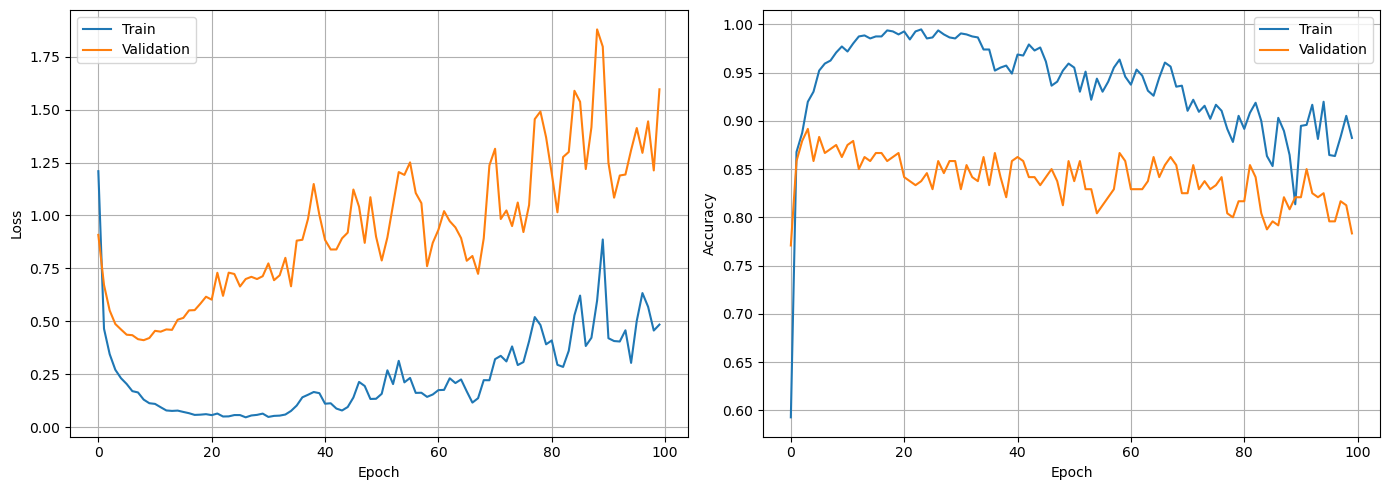

In [103]:
plot_history(history_batch_norm)

In [104]:
results = model_batch_norm.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 1.7418384552001953
Test Accuracy: 0.7912999987602234


## Layer Normalization

[Layer normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LayerNormalization) is another type of normalization technique. Unlike batch normalization, it normalizes the data across the features and is not dependent on the batch size, making it effective for both training and inference time normalization.

Layer normalization computes the mean and variance used for normalization from all of the summed inputs. It is applied elementwise, i.e., independently to each input in a layer on a single training example.

- With Functional API:
```python
next_layer = layers.LayerNormalization(axis=1)(prev_layer)
```

- With Sequential:
```python
model.add(layers.LayerNormalization(axis=1))
```

In [105]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# Hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.LayerNormalization(axis=1)(l_1)

# Hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.LayerNormalization(axis=1)(l_2)

# Hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Creating Model
model_layer_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_layer_norm')

In [106]:
model_layer_norm.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [107]:
history_layer_norm = model_layer_norm.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 [==============================] - 0s 15ms/step - loss: 1.7887 - accuracy: 0.4542 - val_loss: 0.8539 - val_accuracy: 0.7958
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6672 - accuracy: 0.8094 - val_loss: 0.5280 - val_accuracy: 0.8375
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4306 - accuracy: 0.8729 - val_loss: 0.4148 - val_accuracy: 0.8708
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3071 - accuracy: 0.9125 - val_loss: 0.3890 - val_accuracy: 0.8750
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2399 - accuracy: 0.9385 - val_loss: 0.3598 - val_accuracy: 0.8875
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2118 - accuracy: 0.9479 - val_loss: 0.3982 - val_accuracy: 0.8792
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1721 - accuracy: 0.9510 - val_loss: 0.3845 - val_accuracy: 0.8917
Epoch 8/100


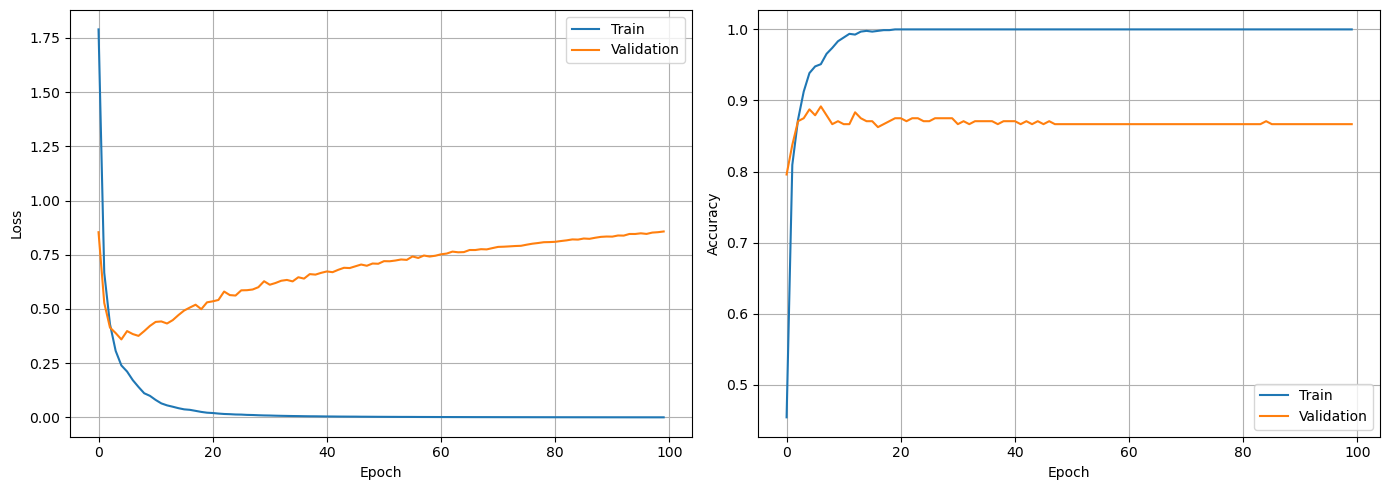

In [108]:
plot_history(history_layer_norm)

In [109]:
results = model_layer_norm.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.7544840574264526
Test Accuracy: 0.8794000148773193


<a id='l1_l2_elasticnet'></a>
## L1, L2 and ElasticNet

During training, the network learns the weights and biases configuration that minimizes a given loss function. Regularization adds a penalty term to the loss to prevent weights from becoming too large.

* [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization), where the cost added is proportional to the absolute value of the weights coefficients ("L1 norm" of the weights).

```python
tf.keras.regularizers.l1(l1=0.01)

layers.Dense(3, kernel_regularizer='l1')

```


* [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization), where the cost added is proportional to the square of the value of the weights coefficients ( "L2 norm" of the weights). 

```python
tf.keras.regularizers.l2(l2=0.01)

layers.Dense(3, kernel_regularizer='l2')

```
* L1_L2 or Elastic Net.

```python
tf.keras.regularizers.l1_l2(
    l1=0.01, l2=0.01
)

layers.Dense(3, kernel_regularizer='l1_l2')

```

Furthermore, it is possible to choose whether to include the penalty in the cost function on the weights, the biases or on the activation, with the following arguments:
- `kernel_regularizer`: only on weights.
- `bias_regularizer`: only on biases.
- `activity_regularizer`: on full output.

[link to documentation](https://keras.io/api/layers/regularizers/).

In [110]:
from tensorflow.keras import regularizers

In [111]:
kerner_regularizer_l1 = regularizers.l1_l2(l1=1e-5, l2=5e-4)
kerner_regularizer_l2 = regularizers.l2(5e-4)
kerner_regularizer_l3 = regularizers.l1(1e-5)

In [112]:

# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l1, name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l3, name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_regularizers = keras.Model(inputs=inputs,
                                 outputs=outputs,
                                 name='dont_overfit_model_regularizers')

In [113]:
model_regularizers.summary()

Model: "dont_overfit_model_regularizers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 layer_3 (Dense)             (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 251658 (983.04 KB)
Tr

In [114]:
model_regularizers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [115]:
history_regularizers = model_regularizers.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 [==============================] - 0s 17ms/step - loss: 1.8894 - accuracy: 0.5021 - val_loss: 1.1805 - val_accuracy: 0.7458
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.9511 - accuracy: 0.8042 - val_loss: 0.7693 - val_accuracy: 0.8500
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 0.6781 - accuracy: 0.8865 - val_loss: 0.7635 - val_accuracy: 0.8583
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 0.5341 - accuracy: 0.9187 - val_loss: 0.7125 - val_accuracy: 0.8667
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.4616 - accuracy: 0.9458 - val_loss: 0.6613 - val_accuracy: 0.8792
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 0.4296 - accuracy: 0.9448 - val_loss: 0.6735 - val_accuracy: 0.8667
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 0.4181 - accuracy: 0.9479 - val_loss: 0.6410 - val_accuracy: 0.8875
Epoch 

Lets compare the weights norms of the model without regularization and with regularization.

In [116]:
for ly in model.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 254.16274160220652, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 180.12646382125533, shape:(256, 128), sparsity:0.0
L2 norm layer_3 weights: 82.72962244376255, shape:(128, 128), sparsity:0.0


In [117]:
for ly in model_regularizers.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 110.73197952291154, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 71.37963467329985, shape:(256, 128), sparsity:0.71
L2 norm layer_3 weights: 38.31706870190164, shape:(128, 128), sparsity:0.0


In [118]:
for ly in model_batch_norm.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 50.037503025074855, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 36.51126384686392, shape:(256, 128), sparsity:0.0
L2 norm layer_3 weights: 39.27384389709167, shape:(128, 128), sparsity:0.0


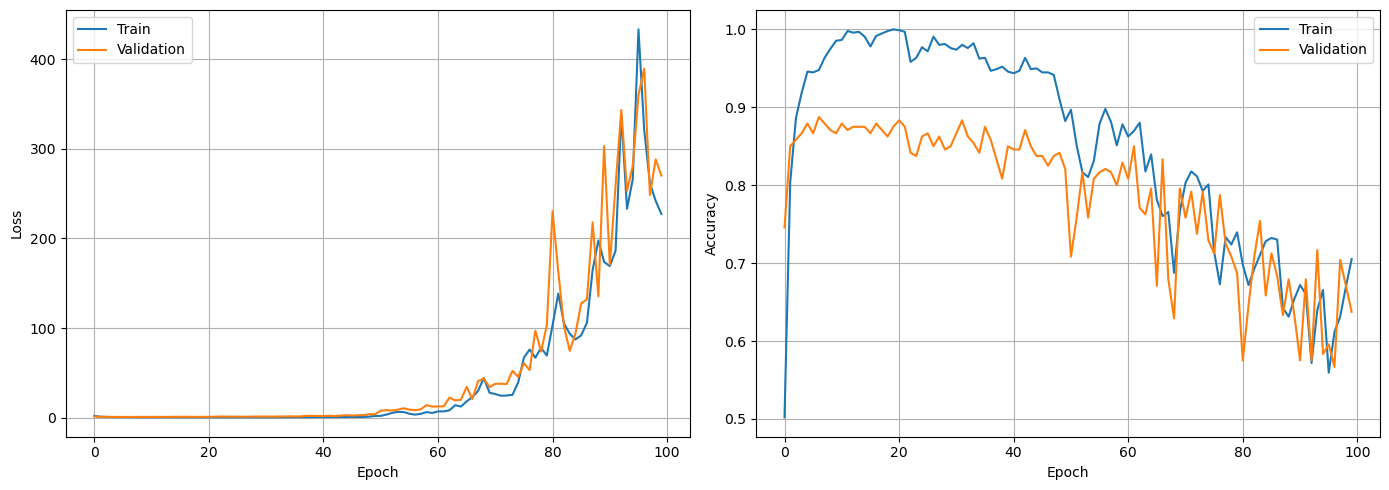

In [119]:
plot_history(history_regularizers)

In [120]:
results = model_regularizers.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 226.75852966308594
Test Accuracy: 0.6424000263214111


### Question 3:
#### What happens if you change the regularizers?


## Combine L2 Regularization, Dropout, LN BN

Use L2: 
```python
kerner_regularizer_l2 = regularizers.l2(5e-4)
```
And Dropout:

```python
next_layer = layers.Dropout(0.4)(prev_layer)
```

In [121]:
kerner_regularizer_l2 = ...

In [122]:
inputs = tf.keras.Input(shape=(..., ), name='input_layer')  

# Convert the 2D image to a vector
flat = layers....()(inputs)


# Add L2-normalization
l_1 = layers.Dense(128, activation='relu',
                   kernel_regularizer=...,
                   name='layer_1')(flat)

# Add dropout
l_1 = ...(l_1)


# Add L2-normalization
l_2 = layers.Dense(64,
                   activation='relu',
                   kernel_regularizer=...,
                   name='layer_2')(l_1)
# Add dropout
l_2 = ...(l_2)


# Add L2-normalization
l_3 = layers.Dense(32,
                   activation='relu',
                   kernel_regularizer=...,
                   name='layer_3')(l_2)

# Add dropout
l_3 = ...(l_3)


outputs = layers.Dense(..., activation=...,
                       name='output_layer')(l_3)  

model_combination = keras.Model(inputs=inputs,
                                 outputs=outputs,
                                 name='dont_overfit_model_regularizers')

SyntaxError: invalid syntax (831890488.py, line 4)

In [ ]:
model_combination.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

In [ ]:
history_combination = model_combination.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

In [ ]:
plot_history(history_combination)

In [ ]:
results = model_combination.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

## Noise injection 

Apply additive zero-mean Gaussian noise.

With Functional API:
```python
next_layer = layers.GaussianNoise(stddev)(prev_layer)
```
With Sequential:
```python
model.add(layers.GaussianNoise(stddev)())
```

In [ ]:
stddev = 2

# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')  
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)  
l_1 = layers.GaussianNoise(stddev, name='noise_l1')(l_1) 
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1) 
l_2 = layers.GaussianNoise(stddev, name='noise_l2')(l_2)  
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)  
l_3 = layers.GaussianNoise(stddev, name='noise_l3')(l_3)  

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)  

model_noise = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_noise')

In [ ]:
model_noise.summary()

In [ ]:
model_noise.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_noise = model_noise.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

In [ ]:
plot_history(history_noise)

In [ ]:
results = model_noise.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

<a id='early_stopping'></a>
## Early Stopping

Another of the most used techniques in neural network training is **early stopping**. It basically consists of stopping the training process in an Epoch prior to the one defined in the compilation.

This, in addition to resulting in a model with less overfitting, saves unnecessary computation time.

To do this, we can use the [Keras callbacks](https://keras.io/api/callbacks/), objects that perform actions at different times during training. Specifically, we will make use of [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/).

```python
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    restore_best_weights=True,
    verbose=0,
)
``` 

- **monitor**: Quantity to be monitored. Depending on the evolution, it will be decided to stop training.

- **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

- **patience**: Number of epochs with no improvement after which training will be stopped.

- **verbose**: verbosity mode.

There are other callbacks that can be very useful such as:
- [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/), which allows storing the state of a model at different times of training. This is very useful in trainings that can take hours or days.
- [`TensorBoard`](https://keras.io/api/callbacks/tensorboard/), which allows the use of [TensorBoard](https://www.tensorflow.org/tensorboard?hl=es-419), framework TensorFlow for visualizing metrics and evaluating models.

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)

Lets create the same model:

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')  
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)  
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)  
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)  

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)  

model_early_stopping = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_early_stopping')

In [ ]:
model_early_stopping.summary()

In [ ]:
model_early_stopping.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [ ]:
history_early_stopping = model_early_stopping.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es_callback]
)

In [ ]:
plot_history(history_early_stopping)

In [ ]:
results = model_early_stopping.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

<a id='tensorboard'></a>
# TensorBoard



[TensorBoard](https://www.tensorflow.org/tensorboard) is a set of TensorFlow tools that allows us to represent the evolution and results of the training.

In order to introduce this tool, the following is a notebook from the [TensorFlow tutorial on TensorBoard](https://www.tensorflow.org/tensorboard/get_started).

Load TensorBoard notebook extension.

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime


We build the model. The input layer will have a dimension of `28x28`. The output layer, in a multiclass classification problem with 10 possible classes, will be made up of 10 neurons with [softmax activation function](https://keras.io/api/layers/activations/#softmax-function ).


In [ ]:
kernel_regularizer_l2 = keras.regularizers.l2(5e-4)

model = tf.keras.models.Sequential(name="tensorboard_model")
model.add(layers.Flatten(input_shape=(28, 28)))

# Hidden Layer + regularization
model.add(layers.Dense(64, activation='relu', name='layer_1'))
model.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=kernel_regularizer_l2, name='layer_2'))
# output layer
model.add(layers.Dense(10, activation='softmax', name='output_layer'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In the [example with early stopping](#early_stopping) the Keras callbacks were presented. To use TensorBoard we will need to include the [`TensorBoard` callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) to the training.

This callback will create and store the logs in the directory that we indicate.

By default it will create a directory called "logs" in the directory where this notebook is running.

In [ ]:
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)

Train the model

In [ ]:
model.fit(
    x=x_train, 
    y=y_train, 
    epochs=20, 
    validation_split=0.2, 
    batch_size=32,
    callbacks=[tensorboard_callback, es_callback]
)

In [ ]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

To ** start TensorBoard ** we can execute the following cell or, from the command line, execute:

    tensorboard --logdir logs / fit

An application will be launched that will be listening by default on port 6006. It is possible to use TensorBoard by opening [localhost: 6006 /](http://localhost:6006/) in a browser.

In [ ]:
%tensorboard --logdir logs/fit

A brief overview of the dashboards shown (tabs in top navigation bar):

* The **Scalars** dashboard shows how the loss and metrics change with every epoch. You can use it to also track training speed, learning rate, and other scalar values.
* The **Graphs** dashboard helps you visualize your model. In this case, the Keras graph of layers is shown which can help you ensure it is built correctly. 
* The **Distributions** and **Histograms** dashboards show the distribution of a Tensor over time. This can be useful to visualize weights and biases and verify that they are changing in an expected way.



### Improve the last model with some regularization techniques to obtain at least `0.98` of test accuracy

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))

## Hidden Layer + regularization
model.add(...)
### output layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x=x_train, 
    y=y_train, 
    epochs=5, 
    validation_split=0.2, 
    batch_size=64
)
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
model.fit(
    x=x_train, 
    y=y_train, 
    epochs=..., 
    validation_split=0.2, 
    batch_size=...,
    callbacks=...
)
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

### Plotting Predictions

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, -1)

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(14, 14))
axes = axes.ravel()

for i in np.arange(0, L * W):
    ind = np.random.randint(len(y_test))
    axes[i].imshow(x_test[ind].reshape(28, 28))
    prob_pred = np.max(predictions[ind, :])
    class_pred = int(predicted_classes[ind])
    original_class = int(y_test[ind])
    if class_pred == original_class:
        color = 'green'
    else:
        color = 'red'
    title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
    class_pred, original_class, prob_pred)
    axes[i].set_title(title, color=color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

## Summary: Regularization Techniques Comparison

| Technique | Description | Key Parameter |
|-----------|-------------|---------------|
| **Simpler Model** | Reduce number of layers/neurons | Architecture design |
| **Smaller Batch Size** | Add noise to gradient estimation | `batch_size` |
| **Dropout** | Randomly drop neurons during training | `rate` (0.0-1.0) |
| **Batch Normalization** | Normalize activations per batch | - |
| **Layer Normalization** | Normalize activations per sample | `axis` |
| **L1 Regularization** | Penalty on absolute weight values (sparsity) | `l1` coefficient |
| **L2 Regularization** | Penalty on squared weight values | `l2` coefficient |
| **Gaussian Noise** | Add noise to layer outputs | `stddev` |
| **Early Stopping** | Stop training when validation loss stops improving | `patience` |

**Tips:**
- Start with a simple model and add complexity if needed
- Dropout (0.2-0.5) and L2 regularization are commonly used together
- Early stopping is almost always recommended
- Monitor validation loss to detect overfitting early